In [107]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import sys


In [109]:
# helper functions

def canny(image, t1=50, t2=150):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, t1, t2)
    return canny


def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

    return line_image


def process_image(image):
    lines = cv2.HoughLinesP(canny(image), 2, np.pi / 180, 50, np.array([]),
                            minLineLength=2, maxLineGap=15)
    line_image = display_lines(image, lines)
    combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return combo_image


def sharpen_image(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened


def cut_lane_region(image):
    return image[150:, :, :]


In [118]:
# sharpen and cut all
os.mkdir('../../data/sharpened__only_lane_region')

for test_dir in os.listdir('../../data/original'):
    os.mkdir(f'../../data/sharpened__only_lane_region/{test_dir}')
    for img_file in os.listdir(f'../../data/original/{test_dir}'):
        if img_file != 'steering.csv':
            image = cv2.imread(f'../../data/original/{test_dir}/{img_file}')
            image = cut_lane_region(image)
            image = sharpen_image(image)
            cv2.imwrite(f'../../data/sharpened__only_lane_region/{test_dir}/{img_file}', image)
        else:
            df = pd.read_csv(f'../../data/original/{test_dir}/steering.csv')
            df.to_csv(f'../../data/sharpened__only_lane_region/{test_dir}/steering.csv')

In [110]:
# test on some images
test_dir = 't11'
img_file = '0.jpg'

image = cv2.imread(f'../../data/original/{test_dir}/{img_file}')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cut_lane_region(image)
sharpened = sharpen_image(image)


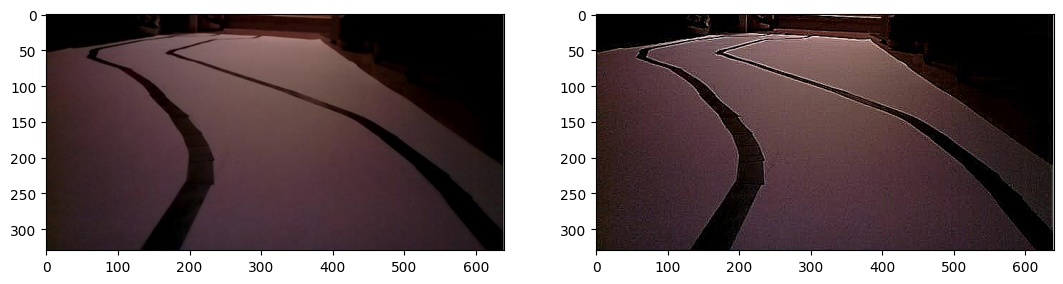

In [111]:
plt.figure(figsize=(13, 20))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.subplot(2, 2, 2)
plt.imshow(sharpened);


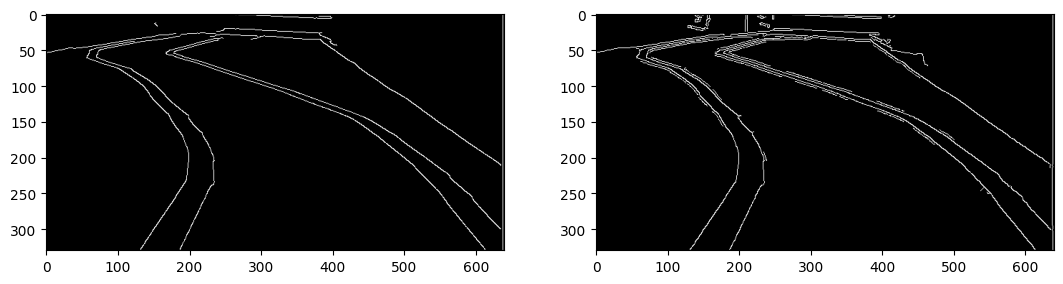

In [112]:
plt.figure(figsize=(13, 20))
plt.subplot(2, 2, 1)
plt.imshow(canny(image), cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(canny(sharpened), cmap='gray');

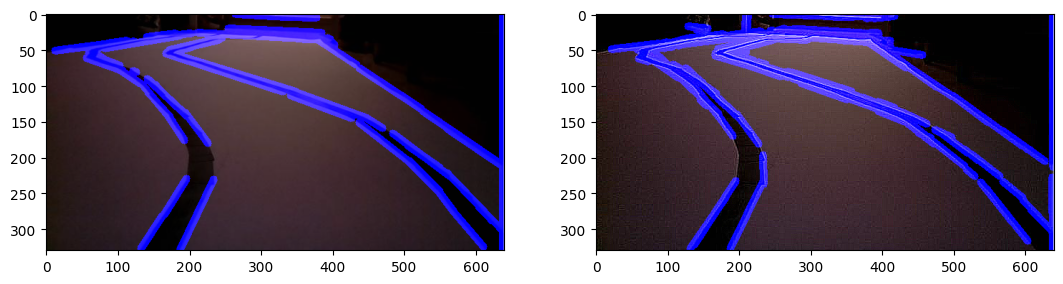

In [113]:
plt.figure(figsize=(13, 20))
plt.subplot(2, 2, 1)
plt.imshow(process_image(image))
plt.subplot(2, 2, 2)
plt.imshow(process_image(sharpened));